In [23]:
#import libraries
import os
from pandas import read_csv
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.utils import shuffle
%matplotlib inline

import pandas_profiling
import numpy as np


from scipy.stats import skew, norm
from scipy import stats
from scipy.special import boxcox1p
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, RobustScaler
from sklearn import linear_model
from sklearn.linear_model import ElasticNetCV, ElasticNet, LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, classification_report, accuracy_score
from math import sqrt



from lightgbm import LGBMRegressor
import lightgbm as lgb

In [2]:
#import data
current_path = os.getcwd()
current_path = os.path.dirname(current_path)
print(current_path)
#C:\Users\jonat\Desktop\capstone\nfl2\nfl_capstone\data_mart
dataset = current_path + '//data_mart//reporting_wr.csv'
print(dataset)
dataset = pd.read_csv(dataset, index_col = 0)
dataset.head()

#https://stackoverflow.com/questions/9856683/using-pythons-os-path-how-do-i-go-up-one-directory

C:\Users\jonat\Desktop\capstone\nfl2\nfl_capstone
C:\Users\jonat\Desktop\capstone\nfl2\nfl_capstone//data_mart//reporting_wr.csv


,espn_id,full_name,first_name,last_name,position,position_group,section,college,draft_year,selection_number,...,receiving_rec_yards_zscore,receiving_receptions_zscore,receiving_rush_att_zscore,receiving_rush_td_zscore,receiving_rush_yds_zscore,receiving_scrim_plays_zscore,receiving_scrim_tds_zscore,receiving_scrim_yds_zscore,receiving_seasons_zscore,max_madden_zscore
fms_id,,,,,,,,,,,,,,,,,,,,,
2,4047646.0,A.J. Brown,A.J.,Brown,WR,WR,O,Ole Miss,2019,NaN,...,1.020082,0.745111,-0.597165,-0.440830,-0.564573,0.523967,0.277925,0.911099,-0.273056,-0.215460
216,3914328.0,Andy Isabella,Andy,Isabella,WR,WR,O,UMass,2019,NaN,...,1.596537,1.364694,1.560318,1.048808,2.030272,1.613414,1.681258,1.821476,0.634520,-0.215460
248,4049301.0,Anthony Johnson,Anthony,Johnson,WR,WR,O,Buffalo,2019,NaN,...,0.363859,-0.080999,-0.381417,-0.440830,-0.602509,-0.166902,0.925617,0.270539,-1.180632,-1.023346
275,4043161.0,Antoine Wesley,Antoine,Wesley,WR,WR,O,Texas Tech,2019,NaN,...,-0.508269,-0.597318,-0.543228,-0.440830,-0.579748,-0.671767,-0.801563,-0.570839,-0.273056,NaN
434,3917067.0,Bisi Johnson,Bisi,Johnson,WR,WR,O,Colorado State,2019,NaN,...,-0.006263,-0.199015,-0.543228,-0.440830,-0.465939,-0.313047,-0.585665,-0.069308,0.634520,NaN


In [ ]:
#pandas_profiling.ProfileReport(dataset)

In [3]:
dataset.describe()

,espn_id,draft_year,selection_number,position_rank,position_group_rank,section_rank,college_weight_pounds,college_height_inches,hw_ratio,forty,...,receiving_rec_yards_zscore,receiving_receptions_zscore,receiving_rush_att_zscore,receiving_rush_td_zscore,receiving_rush_yds_zscore,receiving_scrim_plays_zscore,receiving_scrim_tds_zscore,receiving_scrim_yds_zscore,receiving_seasons_zscore,max_madden_zscore
count,9.900000e+01,811.000000,765.000000,765.000000,765.000000,765.000000,811.000000,811.000000,811.000000,787.000000,...,8.110000e+02,8.110000e+02,8.110000e+02,8.110000e+02,8.110000e+02,8.110000e+02,8.110000e+02,8.110000e+02,8.110000e+02,3.230000e+02
mean,3.469118e+06,2009.817509,185.003922,21.166013,21.166013,64.852288,201.985203,72.688039,0.361295,4.511931,...,6.570987e-17,1.138971e-16,-3.942592e-17,1.095165e-17,-2.190329e-17,-1.314197e-16,-7.009053e-17,-9.637448e-17,1.182778e-16,-3.299734e-16
std,1.078099e+06,5.793248,107.459532,12.324364,12.324364,38.083820,15.037641,2.257518,0.020896,0.099688,...,1.000617e+00,1.000617e+00,1.000617e+00,1.000617e+00,1.000617e+00,1.000617e+00,1.000617e+00,1.000617e+00,1.000617e+00,1.001552e+00
min,2.460440e+05,2000.000000,2.000000,1.000000,1.000000,1.000000,149.000000,65.000000,0.311741,4.220000,...,-2.153612e+00,-2.043011e+00,-5.971654e-01,-4.408299e-01,-7.694291e-01,-1.987075e+00,-1.773101e+00,-2.161940e+00,-2.995783e+00,-2.292880e+00
25%,3.126105e+06,2005.000000,83.000000,11.000000,11.000000,31.000000,191.500000,71.000000,0.345972,4.450000,...,-6.257930e-01,-6.710782e-01,-5.432283e-01,-4.408299e-01,-5.645730e-01,-6.584813e-01,-6.936139e-01,-6.223312e-01,-2.730561e-01,-6.771090e-01
50%,3.917067e+06,2010.000000,191.000000,21.000000,21.000000,63.000000,202.000000,73.000000,0.360000,4.510000,...,-2.221694e-02,-5.149547e-02,-3.814170e-01,-4.408299e-01,-3.976531e-01,-8.718590e-02,-4.592147e-02,-3.635293e-02,6.345196e-01,-2.154600e-01
75%,4.038990e+06,2015.000000,300.000000,31.000000,31.000000,98.000000,213.000000,74.000000,0.375000,4.570000,...,6.845254e-01,5.975912e-01,1.309853e-01,3.039890e-01,1.334554e-01,5.903970e-01,6.017709e-01,6.665120e-01,6.345196e-01,5.924257e-01
max,4.591752e+06,2019.000000,300.000000,53.000000,53.000000,145.000000,247.000000,78.000000,0.450000,4.850000,...,3.459912e+00,3.666001e+00,8.733951e+00,7.007359e+00,1.013347e+01,3.300729e+00,4.703823e+00,3.286937e+00,1.542095e+00,2.900671e+00


In [4]:
dataset.columns

Index(['espn_id', 'full_name', 'first_name', 'last_name', 'position',
       'position_group', 'section', 'college', 'draft_year',
       'selection_number', 'position_rank', 'position_group_rank',
       'section_rank', 'drafting_team', 'home_city', 'home_state',
       'home_country', 'college_weight_pounds', 'college_height_inches',
       'hw_ratio', 'forty', 'vertical', 'bench', 'broad', 'threecone',
       'shuttle', 'receiving_games', 'receiving_rec_td', 'receiving_rec_yards',
       'receiving_receptions', 'receiving_rush_att', 'receiving_rush_td',
       'receiving_rush_yds', 'receiving_scrim_plays', 'receiving_scrim_tds',
       'receiving_scrim_yds', 'receiving_seasons', 'max_madden',
       'college_weight_pounds_zscore', 'college_height_inches_zscore',
       'hw_ratio_zscore', 'forty_zscore', 'vertical_zscore', 'bench_zscore',
       'broad_zscore', 'threecone_zscore', 'shuttle_zscore',
       'receiving_games_zscore', 'receiving_rec_td_zscore',
       'receiving_rec_yard

In [5]:
#determine which columns have None values
none_columns = []
for x in dataset.columns:
    if dataset[x].isnull().values.any() == True:
        none_columns.append(x)
print(none_columns)

['espn_id', 'selection_number', 'position_rank', 'position_group_rank', 'section_rank', 'drafting_team', 'home_city', 'home_state', 'home_country', 'forty', 'vertical', 'bench', 'broad', 'threecone', 'shuttle', 'max_madden', 'forty_zscore', 'vertical_zscore', 'bench_zscore', 'broad_zscore', 'threecone_zscore', 'shuttle_zscore', 'max_madden_zscore']


In [6]:
#Deal with None Values
none_dict = {'espn_id': 0,    
    'selection_number': 400,
    'position_rank': 400,
    'position_group_rank': 400,
    'section_rank': 400,
    'drafting_team': 'No Team',
    'home_city': 'No City',
    'home_state': 'No State',
    'home_country': 'USA',
    'forty': dataset['forty'].mean(),
    'vertical': dataset['vertical'].mean(), 
    'bench': dataset['bench'].mean(), 
    'broad': dataset['broad'].mean(),
    'threecone': dataset['threecone'].mean(),
    'shuttle': dataset['shuttle'].mean(),
    'max_madden': dataset['max_madden'].min() - 10,
    'forty_zscore': dataset['forty_zscore'].mean(), 
    'vertical_zscore': dataset['vertical_zscore'].mean(), 
    'bench_zscore': dataset['bench_zscore'].mean(), 
    'broad_zscore': dataset['broad_zscore'].mean(), 
    'threecone_zscore': dataset['threecone_zscore'].mean(), 
    'shuttle_zscore': dataset['shuttle_zscore'].mean(), 
    'max_madden_zscore': dataset['max_madden_zscore'].min() - 1}

print(none_dict)

for none_col in none_columns:
    dataset[none_col] = dataset[none_col].fillna(none_dict[none_col])
   

#https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html

{'espn_id': 0, 'selection_number': 400, 'position_rank': 400, 'position_group_rank': 400, 'section_rank': 400, 'drafting_team': 'No Team', 'home_city': 'No City', 'home_state': 'No State', 'home_country': 'USA', 'forty': 4.511931385006354, 'vertical': 35.26238390092879, 'bench': 14.531806615776082, 'broad': 120.43402225755167, 'threecone': 6.97023622047244, 'shuttle': 4.220076628352491, 'max_madden': 44.0, 'forty_zscore': -3.7739118621057414e-15, 'vertical_zscore': 1.0559149014391581e-15, 'bench_zscore': -1.8079967831045805e-16, 'broad_zscore': -9.376001123702435e-16, 'threecone_zscore': 3.622648987438306e-15, 'shuttle_zscore': -1.354387015481417e-15, 'max_madden_zscore': -3.2928803580187678}


In [7]:
dataset.head()

,espn_id,full_name,first_name,last_name,position,position_group,section,college,draft_year,selection_number,...,receiving_rec_yards_zscore,receiving_receptions_zscore,receiving_rush_att_zscore,receiving_rush_td_zscore,receiving_rush_yds_zscore,receiving_scrim_plays_zscore,receiving_scrim_tds_zscore,receiving_scrim_yds_zscore,receiving_seasons_zscore,max_madden_zscore
fms_id,,,,,,,,,,,,,,,,,,,,,
2,4047646.0,A.J. Brown,A.J.,Brown,WR,WR,O,Ole Miss,2019,400.0,...,1.020082,0.745111,-0.597165,-0.440830,-0.564573,0.523967,0.277925,0.911099,-0.273056,-0.215460
216,3914328.0,Andy Isabella,Andy,Isabella,WR,WR,O,UMass,2019,400.0,...,1.596537,1.364694,1.560318,1.048808,2.030272,1.613414,1.681258,1.821476,0.634520,-0.215460
248,4049301.0,Anthony Johnson,Anthony,Johnson,WR,WR,O,Buffalo,2019,400.0,...,0.363859,-0.080999,-0.381417,-0.440830,-0.602509,-0.166902,0.925617,0.270539,-1.180632,-1.023346
275,4043161.0,Antoine Wesley,Antoine,Wesley,WR,WR,O,Texas Tech,2019,400.0,...,-0.508269,-0.597318,-0.543228,-0.440830,-0.579748,-0.671767,-0.801563,-0.570839,-0.273056,-3.292880
434,3917067.0,Bisi Johnson,Bisi,Johnson,WR,WR,O,Colorado State,2019,400.0,...,-0.006263,-0.199015,-0.543228,-0.440830,-0.465939,-0.313047,-0.585665,-0.069308,0.634520,-3.292880


In [9]:
#create categories for grades
def f(row):
    if row['max_madden'] > 90 : val = 90
    elif row['max_madden'] < 90 and row['max_madden'] >= 80 : val = 80
    elif row['max_madden'] < 80 and row['max_madden'] >= 70 : val = 70  
    elif row['max_madden'] < 70 and row['max_madden'] >= 60 : val = 60
    elif row['max_madden'] < 60 and row['max_madden'] >= 50 : val = 50
    else: val = 0
    return val
dataset['madden_cat'] = dataset.apply(f, axis=1)



In [10]:
stats_list = ['receiving_rec_td', 'receiving_rec_yards',
       'receiving_receptions', 'receiving_rush_att', 'receiving_rush_td',
       'receiving_rush_yds', 'receiving_scrim_plays', 'receiving_scrim_tds',
       'receiving_scrim_yds']


def game_avg(row):
    #print(row)
    if row['receiving_games'] == 0:
        pass
    else:
        for stat in stats_list:
            row[stat] = row[stat]/row['receiving_games']
    return row
             

dataset = dataset.apply(game_avg, axis=1)

In [11]:
dataset.columns

Index(['espn_id', 'full_name', 'first_name', 'last_name', 'position',
       'position_group', 'section', 'college', 'draft_year',
       'selection_number', 'position_rank', 'position_group_rank',
       'section_rank', 'drafting_team', 'home_city', 'home_state',
       'home_country', 'college_weight_pounds', 'college_height_inches',
       'hw_ratio', 'forty', 'vertical', 'bench', 'broad', 'threecone',
       'shuttle', 'receiving_games', 'receiving_rec_td', 'receiving_rec_yards',
       'receiving_receptions', 'receiving_rush_att', 'receiving_rush_td',
       'receiving_rush_yds', 'receiving_scrim_plays', 'receiving_scrim_tds',
       'receiving_scrim_yds', 'receiving_seasons', 'max_madden',
       'college_weight_pounds_zscore', 'college_height_inches_zscore',
       'hw_ratio_zscore', 'forty_zscore', 'vertical_zscore', 'bench_zscore',
       'broad_zscore', 'threecone_zscore', 'shuttle_zscore',
       'receiving_games_zscore', 'receiving_rec_td_zscore',
       'receiving_rec_yard

In [12]:

#Total Features
"""['espn_id', 'full_name', 'first_name', 'last_name', 'position',
       'position_group', 'section', 'college', 'draft_year',
       'selection_number', 'position_rank', 'position_group_rank',
       'section_rank', 'drafting_team', 'home_city', 'home_state',
       'home_country', 'college_weight_pounds', 'college_height_inches',
       'hw_ratio', 'forty', 'vertical', 'bench', 'broad', 'threecone',
       'shuttle', 'receiving_games', 'receiving_rec_td', 'receiving_rec_yards',
       'receiving_receptions', 'receiving_rush_att', 'receiving_rush_td',
       'receiving_rush_yds', 'receiving_scrim_plays', 'receiving_scrim_tds',
       'receiving_scrim_yds', 'receiving_seasons', 'max_madden',
       'college_weight_pounds_zscore', 'college_height_inches_zscore',
       'hw_ratio_zscore', 'forty_zscore', 'vertical_zscore', 'bench_zscore',
       'broad_zscore', 'threecone_zscore', 'shuttle_zscore',
       'receiving_games_zscore', 'receiving_rec_td_zscore',
       'receiving_rec_yards_zscore', 'receiving_receptions_zscore',
       'receiving_rush_att_zscore', 'receiving_rush_td_zscore',
       'receiving_rush_yds_zscore', 'receiving_scrim_plays_zscore',
       'receiving_scrim_tds_zscore', 'receiving_scrim_yds_zscore',
       'receiving_seasons_zscore', 'max_madden_zscore', 'madden_cat'']"""


features = ['hw_ratio', 'forty', 'vertical', 'bench', 'broad', 'threecone',
       'shuttle', 'receiving_games', 'receiving_rec_td', 'receiving_rec_yards',
       'receiving_receptions', 'receiving_rush_att', 'receiving_rush_td',
       'receiving_rush_yds', 'receiving_scrim_plays', 'receiving_scrim_tds',
       'receiving_scrim_yds', 'receiving_seasons', 'madden_cat']

z_features = ['hw_ratio_zscore', 'forty_zscore', 'vertical_zscore', 'bench_zscore',
       'broad_zscore', 'threecone_zscore', 'shuttle_zscore',
       'rushing_games_zscore', 'rushing_rec_td_zscore',
       'rushing_rec_yards_zscore', 'rushing_receptions_zscore',
       'rushing_rush_att_zscore', 'rushing_rush_td_zscore',
       'rushing_rush_yds_zscore', 'rushing_scrim_plays_zscore',
       'rushing_scrim_tds_zscore', 'rushing_scrim_yds_zscore',
       'rushing_seasons_zscore', 'madden_cat']

#limit_features = ['rushing_rush_yds_zscore', 'rushing_scrim_yds_zscore', 'broad_zscore', 'rushing_receptions_zscore', 
#'rushing_rush_att_zscore', 'rushing_scrim_plays_zscore', 'rushing_seasons_zscore', 'vertical_zscore', 'max_madden']

In [13]:
#create the dataset with the features we want to feed the model
bl_data = dataset[features].copy()
bl_data = shuffle(bl_data)
value_data, label_data = bl_data[:].drop(['madden_cat'], axis =1), bl_data.pop('madden_cat')

In [14]:
#feature Engineering
#Z_score transformations

value_cols = value_data.columns
for col in value_cols:
    value_data[col] = stats.zscore(value_data[col].values)

    
value_data.head()



,hw_ratio,forty,vertical,bench,broad,threecone,shuttle,receiving_games,receiving_rec_td,receiving_rec_yards,receiving_receptions,receiving_rush_att,receiving_rush_td,receiving_rush_yds,receiving_scrim_plays,receiving_scrim_tds,receiving_scrim_yds,receiving_seasons
fms_id,,,,,,,,,,,,,,,,,,
4051,-0.613433,1.712545e+00,-1.144615,1.229104e-15,-2.242688,1.786428e+00,8.132607e-02,-0.940089,0.093230,1.120901,1.466724,2.053413,0.717396,2.304078,1.848743,0.192845,1.408463,-1.180632
4878,-0.279889,9.050145e-15,-1.144615,-8.759090e-01,-0.673555,-1.058611e-14,2.452342e-01,-0.707929,0.925244,0.871187,0.899447,-0.542878,-0.431629,-0.418777,0.683934,0.851188,0.790560,-0.273056
296,-1.262604,-7.329490e-01,0.000000,1.229104e-15,0.000000,-1.058611e-14,7.278983e-15,0.762415,0.121155,-0.114115,-0.249033,0.231502,-0.431629,0.265244,-0.169098,0.058670,-0.074595,0.634520
3887,0.089199,-1.215755e-01,0.000000,1.229104e-15,0.000000,-1.058611e-14,7.278983e-15,0.220709,-0.378439,-0.119041,-0.198015,-0.232279,-0.431629,-0.547072,-0.238372,-0.433735,-0.191200,0.634520
2725,1.211647,8.221562e-02,0.609647,1.229104e-15,0.699437,-8.357311e-01,-7.382146e-01,0.065936,1.526588,0.868620,0.437817,-0.622519,-0.431629,-0.569712,0.243495,1.443879,0.767286,-0.273056


In [16]:
#quick check that the original dataset and copied dataset have the same score
print(label_data[296])
dataset['max_madden'][296]

60


68.0

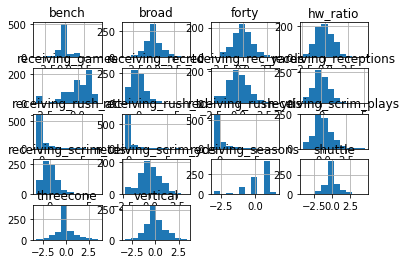

In [17]:
# histograms for some interesting measurements
value_data.hist()
pyplot.show()

In [18]:
X_train, X_validation, Y_train, Y_validation = train_test_split(value_data, label_data, test_size=0.20, random_state=1)

In [19]:
X_train.values

array([[ 3.04166845e-01,  8.97380209e-01,  2.58794430e-01, ...,
        -6.05100231e-01, -4.74640809e-01,  6.34519619e-01],
       [ 9.78082877e-01, -9.36740126e-01,  2.58794430e-01, ...,
         1.92742601e+00,  3.07309480e+00, -1.18063174e+00],
       [-6.73894811e-01, -3.25366681e-01,  6.09646899e-01, ...,
         9.47436884e-01,  6.11500694e-01,  6.34519619e-01],
       ...,
       [ 5.34111137e-01, -8.34844552e-01,  0.00000000e+00, ...,
        -5.43397632e-01, -6.34190069e-01,  6.34519619e-01],
       [ 9.29729123e-01,  8.97380209e-01, -9.69189212e-01, ...,
         4.35392568e-01,  8.73303292e-01,  6.34519619e-01],
       [-7.25054959e-01, -1.65000914e+00,  7.85073133e-01, ...,
        -1.92757801e-03, -1.09981579e+00,  6.34519619e-01]])

In [20]:
#Logistic Regression:
clf = LogisticRegression(random_state=0).fit(X_train, Y_train)
madden_predict = clf.predict(X_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))

Accuracy:  0.5521472392638037
R2 : -0.6616210906755491


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [21]:
# Plot feature importance
def plot_feat_import(coef, model_title):
    feature_coef = pd.Series(index=X_train.columns, data=coef)
    print('{} model picked {} out of {} features'.format(model_title, str(sum(feature_coef != 0)), str(X_train.shape[1])))
    top_bottom_10 = pd.concat([feature_coef.sort_values().head(10), feature_coef.sort_values().tail(10)])
    top_bottom_10.plot(kind='barh', title='Feature importance (Top and bottom 10) - {} model'.format(model_title))
    #from W207 project (Fleishman, Hilton, Niu)
    
# Plot predictions
def plot_it(y_train, y_valid, model_title):
    plt.scatter(y_train, train_labels, c = "blue", alpha=0.6, marker = "o", label = "Training data")
    plt.scatter(y_valid, dev_labels, c = "green", alpha=0.6, marker = "o", label = "Validation data")
    plt.title(model_title)
    plt.xlabel("Predicted values")
    plt.ylabel("Real values")
    plt.legend(loc = "upper left")
    plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
    plt.show()

Lasso Model
Accuracy:  0.0
R2 : 0.10068222315969744
MSE : 1075.153374233129
Lasso model picked 14 out of 18 features
----------


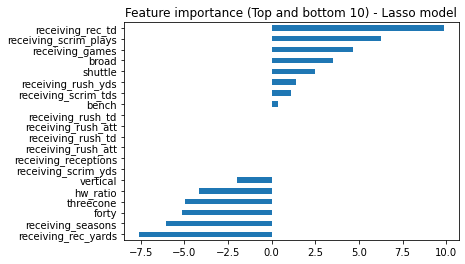

In [24]:
#Lasso:
alpha = 0.1
lasso_model = Lasso(alpha=alpha).fit(X_train, Y_train)
madden_predict = lasso_model.predict(X_validation)

madden_predict = np.around(madden_predict, decimals = 0)

print('Lasso Model')
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(lasso_model.coef_, 'Lasso')  
#plot_it()
print('----------')



Accuracy:  0.0
R2 : 0.10099012082937164
MSE : 1074.7852760736196
LassoCV Model
Lassocv model picked 12 out of 18 features
----------


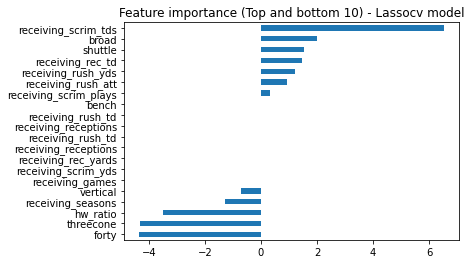

In [25]:
#Lassocv:

lasso_modelcv = LassoCV(cv=5, random_state=0).fit(X_train, Y_train)
madden_predict = lasso_modelcv.predict(X_validation)
madden_predict = np.around(madden_predict, decimals = 0)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
print('LassoCV Model')
plot_feat_import(lasso_modelcv.coef_, 'Lassocv') 
print('----------')


RidgeCV Model
Accuracy:  0.0
R2 : 0.10040511525699058
MSE : 1075.484662576687
RidgeCV model picked 18 out of 18 features
----------
Index(['hw_ratio', 'forty', 'vertical', 'bench', 'broad', 'threecone',
       'shuttle', 'receiving_games', 'receiving_rec_td', 'receiving_rec_yards',
       'receiving_receptions', 'receiving_rush_att', 'receiving_rush_td',
       'receiving_rush_yds', 'receiving_scrim_plays', 'receiving_scrim_tds',
       'receiving_scrim_yds', 'receiving_seasons'],
      dtype='object')
[-4.15095642 -5.16947604 -2.12641817  0.439499    3.62112473 -4.98881263
  2.5861046   4.78468576  5.69186642 -4.42634588  3.38309127  0.59734225
 -0.69073237  2.15423121  3.23120804  5.51275714 -4.01304708 -6.19851348]


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


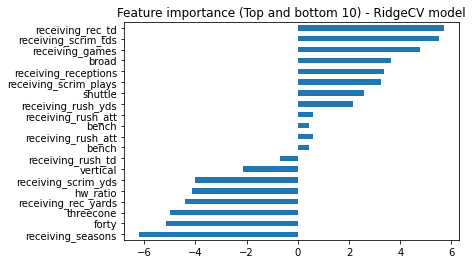

In [26]:
#RidgeCV:

ridge_model = RidgeCV(cv=5).fit(X_train, Y_train)
madden_predict = ridge_model.predict(X_validation)
madden_predict = np.around(madden_predict, decimals = 0)

print('RidgeCV Model')
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))

plot_feat_import(ridge_model.coef_, 'RidgeCV')
print('----------')
print(X_train.columns)
print(ridge_model.coef_)

In [ ]:
['rushing_rush_yds_zscore', 'rushing_scrim_yds_zscore', 'broad_zscore', 'rushing_receptions_zscore', 
'rushing_rush_att_zscore', 'rushing_scrim_plays_zscore', 'rushing_seasons_zscore', 'vertical_zscore']


ElasticNetCV Model
Accuracy:  0.0
R2 : 0.10570608680321614
MSE : 1069.1472392638036
ElasticNetCV model picked 18 out of 18 features


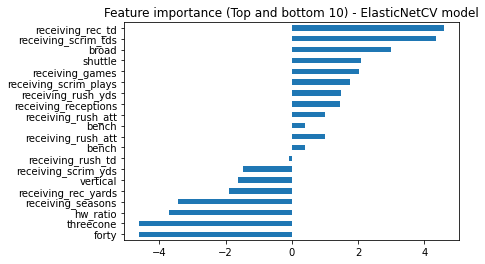

In [27]:
#ElasticNetCV:

elasticnetcv_model = ElasticNetCV(cv=5, random_state=0).fit(X_train, Y_train)
madden_predict = elasticnetcv_model.predict(X_validation)
madden_predict = np.around(madden_predict, decimals = 0)
print('ElasticNetCV Model')
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(elasticnetcv_model.coef_, 'ElasticNetCV')


Accuracy:  0.49693251533742333
R2 : -0.560528022465826
MSE : 1865.644171779141
Decision Tree Regressor model picked 18 out of 18 features


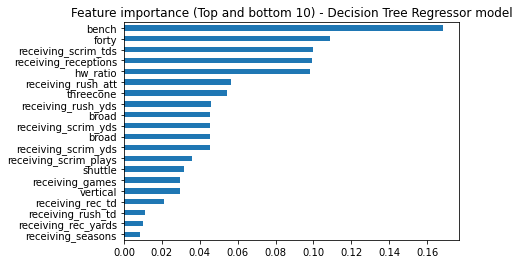

In [28]:
#Decision Tree Regressor
from sklearn import tree
decisiontreeregrssor = DecisionTreeRegressor()
decisiontreeregrssor.fit(X_train, Y_train)
madden_predict = decisiontreeregrssor.predict(X_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(decisiontreeregrssor.feature_importances_, 'Decision Tree Regressor')

Accuracy:  0.5398773006134969
R2 : -0.1135632386553247
MSE : 1331.2883435582821
AdaBoostRegressor model picked 18 out of 18 features


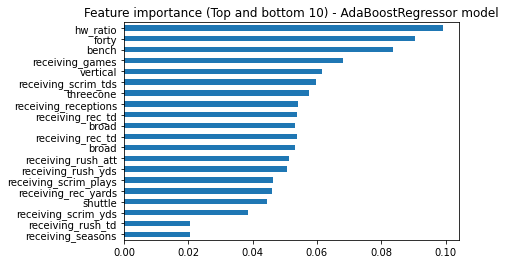

In [29]:
#Adaboost
adaboostregressor = AdaBoostRegressor(DecisionTreeRegressor(), n_estimators=300)
adaboostregressor.fit(X_train, Y_train)
madden_predict = adaboostregressor.predict(X_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(adaboostregressor.feature_importances_, 'AdaBoostRegressor')



Accuracy:  0.5153374233128835
R2 : -0.572330766470007
MSE : 1879.7546012269938
Decision Tree Classifier model picked 18 out of 18 features


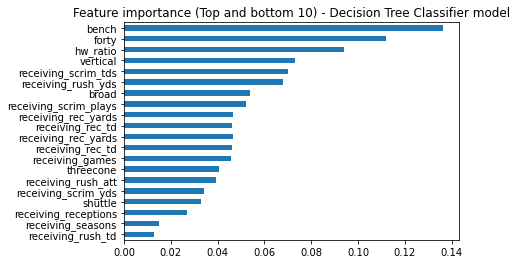

In [30]:
#Decision Tree
from sklearn import tree
decisiontree = DecisionTreeClassifier(max_depth = 100)
decisiontree.fit(X_train, Y_train)
madden_predict = decisiontree.predict(X_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(decisiontree.feature_importances_, 'Decision Tree Classifier')

Accuracy:  0.5766871165644172
R2 : -0.4014475598007796
MSE : 1675.4601226993866
Extra Tree Classifier model picked 18 out of 18 features


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


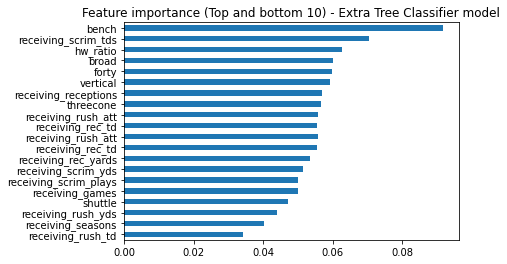

In [31]:
#Extra Tree
from sklearn import tree
extradecisiontree = ExtraTreesClassifier(max_depth = 100)
extradecisiontree.fit(X_train, Y_train)
madden_predict = extradecisiontree.predict(X_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(extradecisiontree.feature_importances_, 'Extra Tree Classifier')

Accuracy:  0.5337423312883436
R2 : -0.5677123014248926
MSE : 1874.2331288343557
AdaBoostRegressor model picked 18 out of 18 features


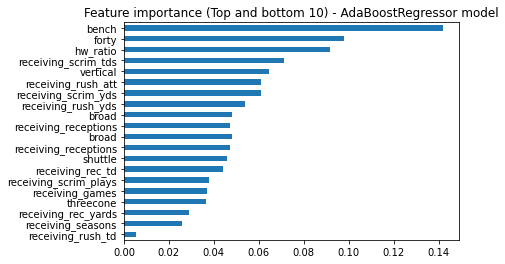

In [32]:
#Adaboost
adaboostclassifier = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=500)
adaboostclassifier.fit(X_train, Y_train)
madden_predict = adaboostclassifier.predict(X_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(adaboostclassifier.feature_importances_, 'AdaBoostRegressor')

In [33]:
#SVM
svmclassifier = SVC(gamma='auto')
svmclassifier.fit(X_train, Y_train)
madden_predict = svmclassifier.predict(X_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(svmclassifier.feature_importances_, 'SVC')

Accuracy:  0.5705521472392638
R2 : -0.6990819738192535
MSE : 2031.2883435582821


AttributeError: 'SVC' object has no attribute 'feature_importances_'

Accuracy:  0.5337423312883436
R2 : -0.6154364402244066
MSE : 1931.2883435582821
AdaBoostRegressor model picked 18 out of 18 features


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


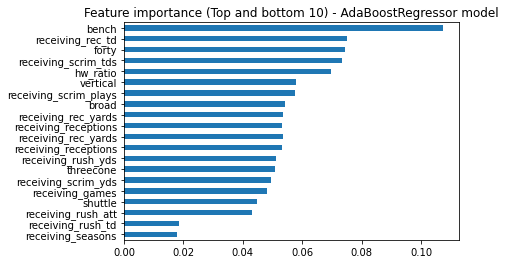

In [34]:
#RandomForest
rfclassifier = RandomForestClassifier()
rfclassifier.fit(X_train, Y_train)
madden_predict = rfclassifier.predict(X_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(rfclassifier.feature_importances_, 'AdaBoostRegressor')

In [46]:
#PCA with Linear Regression
pca = PCA(n_components=5)
pca_x = pca.fit_transform(X_train)
pca_validation = pca.transform(X_validation)

log_pca = LogisticRegression(random_state=0).fit(pca_x, Y_train)
madden_predict = log_pca.predict(pca_validation)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('MSE : ' + str(mean_squared_error(Y_validation, madden_predict)))
#print(log_pca.coef_.shape)
#plot_feat_import(log_pca.coef_, 'PCA with Log Regression')

Accuracy:  0.558282208588957
R2 : -0.7247401129587772
MSE : 2061.963190184049


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [37]:
eclf = VotingClassifier(estimators=[('svc', svmclassifier), ('extratrees', extradecisiontree), ('rf', rfclassifier), ('logpca', log_pca)],voting='hard')


for clf, label in zip([svmclassifier, extradecisiontree, rfclassifier, log_pca, eclf], ['SVC', 'Extra Trees', 'Random Forest', 'Log_pca', 'Ensemble']): 
    scores = cross_val_score(clf, value_data, label_data, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    
#https://scikit-learn.org/stable/modules/ensemble.html



C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Accuracy: 0.60 (+/- 0.00) [SVC]
Accuracy: 0.58 (+/- 0.01) [Extra Trees]
Accuracy: 0.57 (+/- 0.01) [Random Forest]


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class opt

Accuracy: 0.60 (+/- 0.03) [Log_pca]


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\si

Accuracy: 0.61 (+/- 0.01) [Ensemble]


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy:  0.018404907975460124
R2 : 0.15236284701452585
R2 : 1013.3680981595093
Gradient Booster Regressor model picked 18 out of 18 features


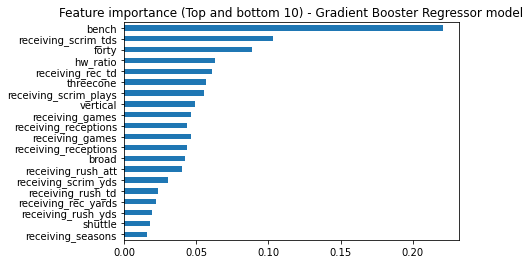

In [38]:
#Gradient Booster Regressor
import numpy as np
gradientboostingregressor = GradientBoostingRegressor(random_state=0)
gradientboostingregressor.fit(X_train, Y_train)
madden_predict = gradientboostingregressor.predict(X_validation)
madden_predict = np.around(madden_predict, decimals = 0)
print('Accuracy:  ' + str(accuracy_score(Y_validation, madden_predict)))
print('R2 : ' + str(r2_score(Y_validation, madden_predict)))
print('R2 : ' + str(mean_squared_error(Y_validation, madden_predict)))
plot_feat_import(gradientboostingregressor.feature_importances_, 'Gradient Booster Regressor')

In [39]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
#models.append(('LASSO', Lasso(alpha=0.1)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('GBC', GradientBoostingClassifier(n_estimators=200)))
models.append(('RFC', RandomForestClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('ETC', ExtraTreesClassifier()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, value_data, label_data, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-package

LR: 0.594508 (0.028656)
LDA: 0.578425 (0.027850)
KNN: 0.576036 (0.021635)
CART: 0.462328 (0.060574)


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


ABC: 0.430915 (0.117137)


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GBC: 0.587420 (0.057595)
RFC: 0.562158 (0.036325)


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

GNB: 0.491974 (0.037705)
SVM: 0.600564 (0.005924)
ETC: 0.574738 (0.036814)


C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jonat\Anaconda3\envs\tf-gpu2.0\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 t

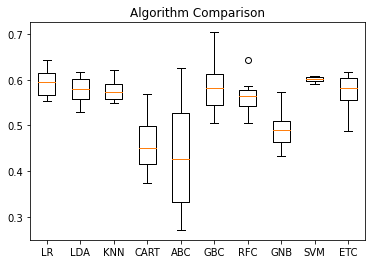

In [40]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()